# Utility Inspector


Drones are flown over utility poles and lines to inspect for maintenance problems. However, drones capture large number of images which have to be manually sorted through in order to find problems. This results in a lot of time being invested and over time, bad judgement calls due to human fatigue. The system we have developed here utilizes deep learning to assist in the first level of separation between utility poles and images with only cables/vegetation, which can be operated upon by the human evaluators. 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64
#bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

In [0]:
Path.ls = lambda x: list(x.iterdir())
img_dir = Path(root_dir)
print(img_dir.ls())
img_path = img_dir.ls()[28]; img_path

[PosixPath('/content/gdrive/My Drive/cv final.pdf'), PosixPath('/content/gdrive/My Drive/GameForBlinds (1).docx'), PosixPath('/content/gdrive/My Drive/GameForBlinds (1).docx.gdoc'), PosixPath('/content/gdrive/My Drive/scanned document0002.PDF'), PosixPath('/content/gdrive/My Drive/Project Proposal.gdoc'), PosixPath('/content/gdrive/My Drive/Project Communicate Observation Report.pdf'), PosixPath('/content/gdrive/My Drive/Project Communicate Literature Review.pdf'), PosixPath('/content/gdrive/My Drive/Copy of Project Communicate Literature Review.pdf'), PosixPath('/content/gdrive/My Drive/testcase5-nestingFunctions.txt'), PosixPath('/content/gdrive/My Drive/testcase5-nestingFunctions.txt.gdoc'), PosixPath('/content/gdrive/My Drive/ABSTRACT(template).pdf'), PosixPath('/content/gdrive/My Drive/Web Content - Project Communicate.gdoc'), PosixPath('/content/gdrive/My Drive/Project Connect Vision.gdoc'), PosixPath('/content/gdrive/My Drive/Time Table.gdoc'), PosixPath('/content/gdrive/My Driv

PosixPath('/content/gdrive/My Drive/utilities')

In [0]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)
data = ImageDataBunch.from_folder(img_path, bs=16,ds_tfms=tfms, size=64)


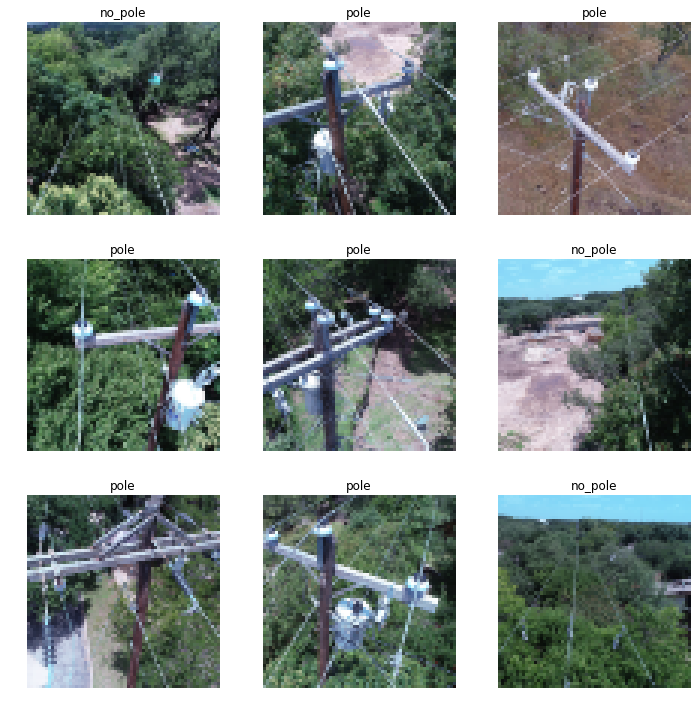

In [0]:
data.show_batch(rows=3, figsize=(10,10))

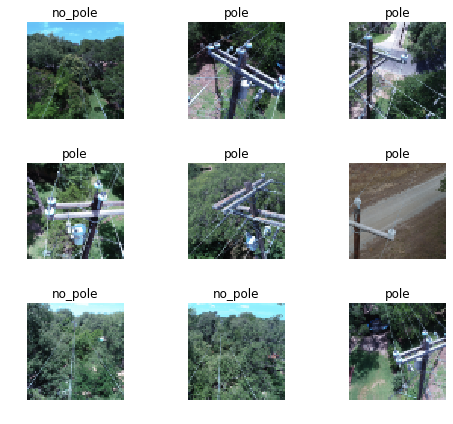

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['no_pole', 'pole']


(2, 2)

## Training: resnet50

In [0]:
tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = ImageDataBunch.from_folder(img_path,ds_tfms=tfms, size=299, bs=bs//2).normalize(imagenet_stats)
#data = ImageDataBunch.from_folder(img_path,ds_tfms=get_transforms(),
                                  # size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, path="/content/gdrive/My Drive/utilities")
learn.save('testing')
learn.export()

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.817386,1.431720,0.896552,00:49
1,0.813786,0.213313,0.137931,00:49
2,0.645834,0.064961,0.000000,00:49
3,0.482709,0.042060,0.000000,00:49
4,0.413709,0.037438,0.000000,00:49
5,0.383114,0.040454,0.000000,00:49
6,0.325607,0.040832,0.000000,00:49
7,0.282193,0.036284,0.000000,00:50


In [0]:
learn.save('stage-1-50')
learn.export('stage-1.pkl')

#zero-error rate here

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

If it doesn't, you can always go back to your previous model.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=1)
#interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.plot_top_losses(2)

In [0]:
learn.export('final.pkl')


We experimented with both Resnet34 and Resnet 50, at different learning rates and varied levels of fine tuning. Amongst all those tried, the current model gives the best results and hence we will use this to create the verification system. 

